In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
P=np.array([[1/2,1/4,1/5],[1/3,1/2,2/5],[1/6,1/4,2/5]]) #transition matrix 

Saving the invariant measure:

In [4]:
eigs, eigen=np.linalg.eig(P)
inv_meas=eigen[:,0]/(np.sum(eigen[:,0])) #the invariant measure is the eigenvector corresponding to 1
inv_meas

array([0.31578947, 0.42105263, 0.26315789])

3)

For simplicity in the simulation loop I consider $S=\{sunny,overcast,rainy\}=\{1,2,3\}$ and at time $t$ if $X_t=i$ then I represent the state at time t as $e_i \ \forall i\in\{1,2,3\}$. Afterwards, to plot the required histograms I reconvert the samples of interest to the inital notation (i.e "sunny","overcast","rainy").

In [5]:
def transform_state(s):
    if(s==1):
        return np.array([1,0,0])
    elif(s==2):
        return np.array([0,1,0])
    else:
        return np.array([0,0,1])

In [6]:
states=[1,2,3] 
s_1=np.array([1,0,0]) #inital state, X_0={sunny}={1}
T=50 #we simulate for 50 days
N=190 #
X=np.zeros((T,N)) #column i-th conatins i-th simulation of the Markov chain up to time (day) T
#Initial state is sunny for each simulation:
X[0,:]=1

In [7]:
#simulations:
for n in range(N):
    s_old=s_1
    for j in range(1,T):
        s_next=np.random.choice(states,p=np.dot(P,s_old.T)) ###
        X[j,n]=s_next
        s_old=transform_state(s_next)


In [8]:
#for plotting histograms:
def reconvert_state(s):
    if(s==1):
        return "sunny"
    elif(s==2):
        return "overcast"
    else:
        return "rainy"
X_2=np.array(list(map(reconvert_state,list(X[1,:])))) #day 2
X_3=np.array(list(map(reconvert_state,list(X[2,:])))) #day 3
X_30=np.array(list(map(reconvert_state,list(X[29,:]))))#day 30

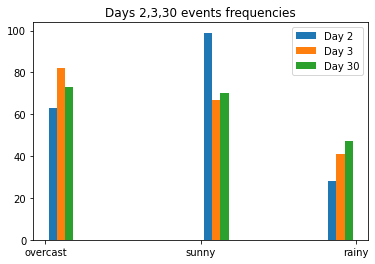

In [9]:
fig, ax = plt.subplots()
ax.hist([X_2,X_3,X_30], label=["Day 2","Day 3","Day 30"], stacked=False)
ax.set_title("Days 2,3,30 events frequencies")
ax.legend(loc="best")

Computing empirical distributions:

In [10]:
p_2={"sunny": np.sum(X_2=="sunny")/N,"overcast": np.sum(X_2=="overcast")/N, "rainy": np.sum(X_2=="rainy")/N}
p_3={"sunny": np.sum(X_3=="sunny")/N, "overcast": np.sum(X_3=="overcast")/N, "rainy": np.sum(X_3=="rainy")/N}
p_30={"sunny": np.sum(X_30=="sunny")/N,"overcast": np.sum(X_30=="overcast")/N,"rainy": np.sum(X_30=="rainy")/N}

Comparison:

In [11]:
print("Distribution at day 30: ", p_30)
print("Invariant Measure: ", inv_meas)

Distribution at day 30:  {'sunny': 0.3684210526315789, 'overcast': 0.38421052631578945, 'rainy': 0.24736842105263157}
Invariant Measure:  [0.31578947 0.42105263 0.26315789]


We have found that the invariant measure $p$ is, given the probability of the event $"rainy"$, $p_r$: $p=\begin{pmatrix}6/5p_r \\ 8/5p_r \\ p_r\end{pmatrix}$. <br>
We notice that, for $t=30$, $p_s\approx 6/5*p_r$, $p_o\approx 8/5*p_r$:

Then it seems that there is convergence to the invariant measure.

4) <br>
The invariant measure, $p\in[0,1]^3$, is the eigenvector of $P$ for $\lambda_1=1$. <br>
$\begin{align}det(P-\lambda I)=-\lambda^3+7/5\lambda^2-13/30\lambda+1/30=0 \iff \lambda=1 \vee \lambda=1/30(6+\sqrt{6})\vee \lambda=1/30(6-\sqrt{6}),\end{align}$
then the other eigenvalues of $P$ are $\lambda_2=1/30(6+\sqrt{6}), \ \lambda_3=1/30(6+\sqrt{6})$. We notice that they are both <1, which is in line with theory since a stochastic matrix has eigenvalues 1 and the others less than 1 in module. Let be $v_2, \ v_3$ the eigenvectors corresponding to $\lambda_2$ and $\lambda_3$. <br>
Proving that the chain converges to the invariant measure means showing that:
$\begin{align}\lim_{t\to\infty} Pp_t=\lim_{t\to\infty}P^tp_1=p,\end{align}$
where $p_t$ is the distribution of $X_t$ and $p_1$ is the initial distribution. <br>
Since $p,v_2,v_3$ form a basis of $[0,1]^3$ we have:
$\begin{align}\exist \alpha,\beta,\gamma\in\mathbb{R} | \ p_1=\alpha p+\beta v_2+ \gamma v_3.\end{align}$
Now we observe that $\forall i\in\{2,3\}$ $<v_i,(1,1,1)>=0$: <br>
$Pv_i=\lambda_i v_i\iff <Pv_i,(1,1,1)>=\lambda_i<v_i,(1,1,1)>\iff\lambda_i<v_i,(1,1,1)>=\sum_{j=1}^3 {v_i}_j  (\sum_{k=1}^3 P_{kj})=<v_i,(1,1,1)>\iff <v_i,(1,1,1)>=0$,<br>
where we have used that $P$ is stochastic and that $\lambda_i<1$ (from which follows the conclusion).<br>
$p_1$ is a probability measure as well as $p$, then: 
$1=\sum_{i=1}^3{p_1}_i=<p_1,(1,1,1)>=\alpha<p,(1,1,1)>+\beta<v_2,(1,1,1)>+\gamma<v_3,(1,1,1)>=\alpha \iff \alpha=1$.<br>
Consequently:
$\begin{align}\lim_{t\to\infty}P^tp_1&=\lim_{t\to\infty}(P^tp+\beta P^tv_2+\gamma P^tv_3)=\\
&=\lim_{t\to\infty}(\lambda_1^t p+\beta \lambda_2^tv_2+\gamma \lambda_3^t v_3)=p,\end{align}$
given that $\lambda_1^t=1^t\to 1 \text{ if } t\to\infty$, while $\lambda_2,\lambda_3<1$, then  $\lambda_i^t\to 0 \text{ if } t\to\infty, \ i\in\{2,3\}$. Moreover the other quantities don't depend on t.

5) <br>
Given the information we can compute the probability of rain at day 2 by considering the results of the simulation excluding all the events $\{X_2="sunny"\}$.

Empirical distribution at day 2:

In [12]:
p_rainy2=np.sum((X_2!="sunny") & (X_2=="rainy"))/np.sum(X_2!="sunny") 

In [13]:
print("Probability of rain at day 2 given that there is no sun: %a" %p_rainy2)

Probability of rain at day 2 given that there is no sun: 0.3076923076923077


In [14]:
p_overcast2=np.sum((X_2!="sunny") & (X_2=="overcast"))/np.sum(X_2!="sunny")

In [15]:
print("Probability of rain at day 2 given that there is no sun: %a" %p_overcast2)

Probability of rain at day 2 given that there is no sun: 0.6923076923076923


If we compute the probability not empirically we get: <br>
Let be $E_1=\{X_1="sunny"\}$ (initial condition), $P_{E_1}(\cdot):=P(\cdot|E_1)$ and $I=\{X_2\neq"sunny"\}$, <br>
$P_{E_1}(X_2="rainy"|I)=\frac{P_{E_1}(X_2="rainy",I)}{P_{E_1}(I)}=\frac{P_{E_1}(X_2="rainy")}{1/3+1/6}=9/2*1/6=1/3\approx 0.33$

6)

In [16]:
X_3_=np.array([X_3[j] for j in range(len(X_3)) if X_2[j]!="sunny"])

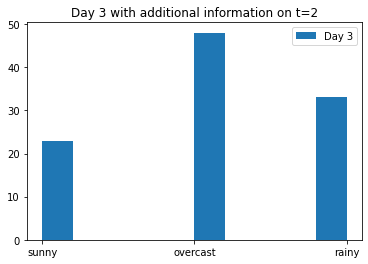

In [17]:
fig, ax = plt.subplots()
ax.hist(X_3_, label="Day 3")
ax.set_title("Day 3 with additional information on t=2")
ax.legend(loc="best")

In [18]:
#Empirical distribution of day 3:
p_3_={"sunny": np.sum(X_3_=="sunny")/len(X_3_),"overcast": np.sum(X_3_=="overcast")/len(X_3_), "rainy": np.sum(X_3_=="rainy")/len(X_3_)}
print("Empirical distribution of X_3 with no information on t=2:\n ", p_3, "\n Empirical distribution of X_3 given I:\n", p_3_)

Empirical distribution of X_3 with no information on t=2:
  {'sunny': 0.37894736842105264, 'overcast': 0.3894736842105263, 'rainy': 0.23157894736842105} 
 Empirical distribution of X_3 given I:
 {'sunny': 0.22115384615384615, 'overcast': 0.46153846153846156, 'rainy': 0.3173076923076923}


We notiche that the probability of the event $\{X_3="sunny"\}$ has decreased.

7) <br>
Given $E_1=\{X_1="sunny"\}$ and introducing the event $I=\{\text{the information of the agent is true}\}$, that has probability 1/2 we get that the distribution of $X_2$ is: <br>
$P_{E_1}(X_2=rainy)=P_{E_1}(X_2=rainy|I)P(I)+P_{E_1}(X_2=rainy|I)P(I^c)=1/2*1/3+1/2*1/6=1/4$ and similarly we get $P_{E_1}(X_2=overcast)=1/2$, $P_{E_1}(X_2=sunny)=1/4$, then the distribution of $X_3$ is: $P\begin{pmatrix}1/4 \\ 1/2 \\ 1/4\end{pmatrix}$

To forecast the weather in day 3 using the simulation results we weight 1/2 the empirical distribution of $X_3$ with no information at day 2 and 1/2 the empirical distribution of $X_3$ given information on day 2:

In [19]:
print("Theoretical distribution of X_3:", np.dot(P,np.array([1/4,1/2,1/4])))

Theoretical distribution of X_3: [0.3        0.43333333 0.26666667]


In [20]:
p_3_7=1/2*np.array(list(p_3_.values()))+1/2*np.array(list(p_3.values()))
print("Empirical distribution of X_3:", p_3_7)

Empirical distribution of X_3: [0.30005061 0.42550607 0.27444332]
